<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Hotel%20Booking%20Project%20using%20Python%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Hotel Booking Project using Python**

# **Problem Statement**


This hotel booking dataset can help us explore many questions regarding cancelations of bookings, how to increase revenue and improve efficiency, which is the busiest period in hotel industry etc. This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. We will explore and analyse the data to discover important factors and draw key insights that govern the bookings.

#### **Business Objective**

***Main objective is to identify key trends and patterns in the data that can be used to improve business strategies in the hotel industry***

Understanding the travel patterns and preferences of their guests is important for hotels in order to make informed decisions about things like peak seasons, common reasons for cancellations, demand for amenities such as parking, and the number of children staying at the property. For many people, traveling is a thrilling and meaningful experience.

In [ ]:
# Importing all the required python modules and libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt, date
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# upgrading matplotlib to the latest version so that we can use the latest features
!pip install --upgrade matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
# Mounting drive
# from google.colab import drive
# drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
# Loading the dataset
# path = "/drive/MyDrive/"
# booking_df = pd.read_csv(path+"Hotel Bookings.csv")

booking_df = pd.read_csv("Hotel Bookings.csv")



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Checking the first 5 rows of the dataset
booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


*   EDA involves investigating the data and making some useful insights out of it.
*   We can explore the data and analyse it using different plots obtained with the use of libraries like *matplotlib* and *seaborn*.
*   In the **non-graphical approach**, we will be using functions such as shape, summary, describe, isnull, info, datatypes and more.
*   In the **graphical approach**, we will be using plots such as pie, scatter, box, bar, density and correlation plots.

### 1. Basic information about the dataset:

In [ ]:
# basic information of the dataset
booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111304 entries, 0 to 111303
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           111304 non-null  object 
 1   is_canceled                     111304 non-null  int64  
 2   lead_time                       111304 non-null  int64  
 3   arrival_date_year               111304 non-null  int64  
 4   arrival_date_month              111304 non-null  object 
 5   arrival_date_week_number        111304 non-null  int64  
 6   arrival_date_day_of_month       111304 non-null  int64  
 7   stays_in_weekend_nights         111304 non-null  int64  
 8   stays_in_week_nights            111304 non-null  int64  
 9   adults                          111304 non-null  int64  
 10  children                        111300 non-null  float64
 11  babies                          111304 non-null  int64  
 12  meal            

In [ ]:
# shape of the dataframe
booking_df.shape

(111304, 32)



*   The dataset has 119390 rows and 32 columns.
*   Some of the columns need conversion of datatypes.
*   Further, we will add new columns to extract insights from the dataset.





In [ ]:
# brief description of the numerical columns of the dataset
booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111300.000000,111304.000000,111303.000000,111303.000000,111303.000000,111303.000000,95479.000000,6572.000000,111303.000000,111303.000000,111303.000000,111303.000000
mean,0.397290,102.222822,2016.095280,27.204817,15.754375,0.932599,2.520260,1.851676,0.101635,0.008158,0.033854,0.093403,0.146106,0.214451,90.481781,187.829276,2.487768,99.622763,0.065182,0.549886
std,0.489339,105.813183,0.693864,14.029843,8.793255,1.007712,1.937874,0.583290,0.394600,0.099078,0.180853,0.874113,1.549133,0.639108,111.859890,130.891865,18.207768,50.397448,0.250139,0.782717
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,17.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,67.000000,0.000000,0.000000
50%,0.000000,67.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,90.950000,0.000000,0.000000
75%,1.000000,158.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,269.000000,0.000000,122.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# brief description of the categorical columns of the dataset
booking_df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,111304,111304,111304,110816,111304,111303,111303,111303,111303,111303,111303,111303
unique,2,12,5,171,9,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,71244,11908,86705,47628,51437,91114,80344,68696,96554,83221,67083,1461


In [ ]:
# creating a copy of the dataframe so that original one remains intact without any alteration
booking_df_c = booking_df.copy()

### 2. Checking for null values:

In [ ]:
#checking if any of the columns has null values, and if found, sorting them in descending order of number of null values
booking_df.isnull().sum().sort_values(ascending = False)

company                           104732
agent                              15825
country                              488
children                               4
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        1
deposit_type                           1
is_repeated_guest                      1
previous_cancellations                 1
days_in_waiting_list                   1
customer_type                          1
adr                                    1
required_car_parking_spaces            1
total_of_special_requests              1
reservation_status                     1
previous_bookings_not_canceled         1
reservation_status_date                1
distribution_channel                   1
is_canceled                            0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

*   From the above data, it can be seen that most of the hotels listed don't
belong to any company ie. they are mostly privately run. Most of the people preferred booking on their own than opting for any agent. Hence, there are so many **null** values in columns namely "company" and "agent". \\
  

*   In few of the cases, country name was not inserted leading to **null** values in those entries. So, we will put "**Others**" in place of all the null values in "**country**" column.

*   In very few cases, the number of children accompanying the adults are missing and hence, we will fill those entries with the median of the entire "**children**" column.

### 3. Removing duplicated rows present if any:

In [ ]:
# checking if the dataset has any duplicated rows
sum(booking_df.duplicated())

30659

In [ ]:
# dropping the duplicate rows
booking_df_c.drop_duplicates(inplace = True)

In [ ]:
# dataframe info after dropping the duplicate rows
booking_df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

After removing the duplicated rows, we have 87396 rows.

Since, the company column has too many **null** values, we can ***drop*** this one to make our analysis more efficient.

In [ ]:
booking_df_c.drop(columns=['company'], axis = 1, inplace = True)

We will ***replace*** all the **null** values of "agent" column with 0.

In [ ]:
booking_df_c['agent'].fillna(0, inplace = True)

In [ ]:
# checking for null values in the "country" column
sum(booking_df_c['country'].isna())

452

Since, many of the country entries are missing, we will fill those values with "Others".

In [ ]:
booking_df_c['country'].fillna('Others', inplace = True)

Four entries of the children column have **null** values. So, we will fill those entries with value = 0.

In [ ]:
booking_df_c['children'].fillna(0, inplace = True)

There are a few columns with outliers. So, we would like to remove them before proceeding to actual EDA.

In [ ]:
booking_df_c = booking_df_c.loc[(booking_df_c['adr']<5000) & (booking_df_c['babies']<5)]

### 4. Getting an insight of all the unique values of each column of the dataset:

In [ ]:
pd.Series({col:booking_df_c[col].unique() for col in booking_df_c})

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                                 [0.0, 1.0, 2.0, 10.0, 3.0]
babies                                                                    [0

The columns of the dataframe and the data they represent are listed below:

1. **hotel** : Name of the hotel namely - Resort Hotel and City Hotel

2. **is_canceled** : If the booking was canceled (1) or not (0)

3. **lead_time** : Number of days before the actual arrival of the guests

4. **arrival_date_year** : Year of arrival date

5. **arrival_date_month** : Month of arrival date

6. **arrival_date_week_number** : Week number of the year for arrival date

7. **arrival_date_day_of_month** : Day of arrival date

8. **stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

9. **stays_in_week_nights** : Number of weeknights (Monday to Friday) spent at the hotel by the guests.

10. **adults** : Number of adults among the guests

11. **children** : Number of children accompanying the adults

12. **babies** : Number of babies accompanying the adults

13. **meal** : Type of meal booked

14. **country** : Country of origin of the guests

15. **market_segment** : Designation of market segment

16. **distribution_channel** : Name of booking distribution channel

17. **is_repeated_guest** : If the booking was from a repeated guest (1) or not (0)

18. **previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

19. **previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

20. **reserved_room_type** : Code of room type reserved

21. **assigned_room_type** : Code of room type assigned

22. **booking_changes** : Number of changes made to the booking

23. **deposit_type** : Type of the deposit made by the guest

24. **agent** : ID of travel agent who made the booking

25. **company** : ID of the company that made the booking

26. **days_in_waiting_list** : Number of days the booking was in the waiting list

27. **customer_type** : Type of customer, assuming one of four categories

28. **adr** : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

29. **required_car_parking_spaces** : Number of car parking spaces required by the customer

30. **total_of_special_requests** : Number of special requests made by the customer

31. **reservation_status** : Reservation status (Cancelled, Check-Out or No-Show)

32. **reservation_status_date** : Date at which the last reservation status was updated

It can be observed from the unique values of columns namely "adults", "children" and "babies" that there are entries with value = 0. If the number of adults = 0, then we need to remove those rows as "children" and "babies" can't book a hotel without being accompanied by an adult.

In [ ]:
filter=(booking_df_c['children']==0) & (booking_df_c['adults']==0) & (booking_df_c['babies']==0)
booking_df_c[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,1,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,0,No Deposit,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [ ]:
booking_df_c.drop(booking_df_c[filter].index, inplace = True)

In [ ]:
# renaming the values in the is_canceled column to appropriate names to ease the analysis
booking_df_c['is_canceled'] = np.where(booking_df_c['is_canceled'] == 0, 'not_canceled', 'canceled')

In [ ]:
booking_df_c.shape

(87227, 31)

In [ ]:
booking_df_c.isnull().sum().sort_index(ascending = False).head()

total_of_special_requests    0
stays_in_weekend_nights      0
stays_in_week_nights         0
reserved_room_type           0
reservation_status_date      0
dtype: int64

As we don't have any null values, we can proceed to change the datatypes of the columns wherever required.

### 5. Converting columns of the dataframe to appropriate datatypes:

In [ ]:
# converting datatype of columns 'children' and 'agent' from float to int.
booking_df_c[['children', 'agent']] = booking_df_c[['children', 'agent']].astype('int64')

In [ ]:
# converting datatype of column 'reservation_status_date' from str to datetime.
booking_df_c['reservation_status_date'] = pd.to_datetime(booking_df_c['reservation_status_date'], format = '%Y-%m-%d')

### 6. Adding new columns:

In [ ]:
# Adding length_of_stay in the hotel as the sum of stays in weekend_nights and week_nights
booking_df_c['length_of_stay'] = booking_df_c['stays_in_weekend_nights'] + booking_df_c['stays_in_week_nights']

In [ ]:
# adding revenue which is equal to adr*length_of_stay
booking_df_c['revenue'] = [los * adr if los > 0 else adr for los, adr in zip(booking_df_c['length_of_stay'], booking_df_c['adr'])]

In [ ]:
# adding guest in total
booking_df_c['guest_in_total'] = booking_df_c['adults'] + booking_df_c['children'] + booking_df_c['babies']

## **Exploratory Data Analysis**

### **Q. What is the percentage of booking in each hotel?**

Since, there are two types of hotels - Resort and City hotel which is evident from the series depicting unique values of each column, we can use a *pie chart* or a *bar plot* to display the data.

In [ ]:
# setting the background
sns.set_style("ticks")
# setting the color pallette
sns.set_palette(sns.color_palette("rainbow"))
# changing the default context
sns.set_context('talk')

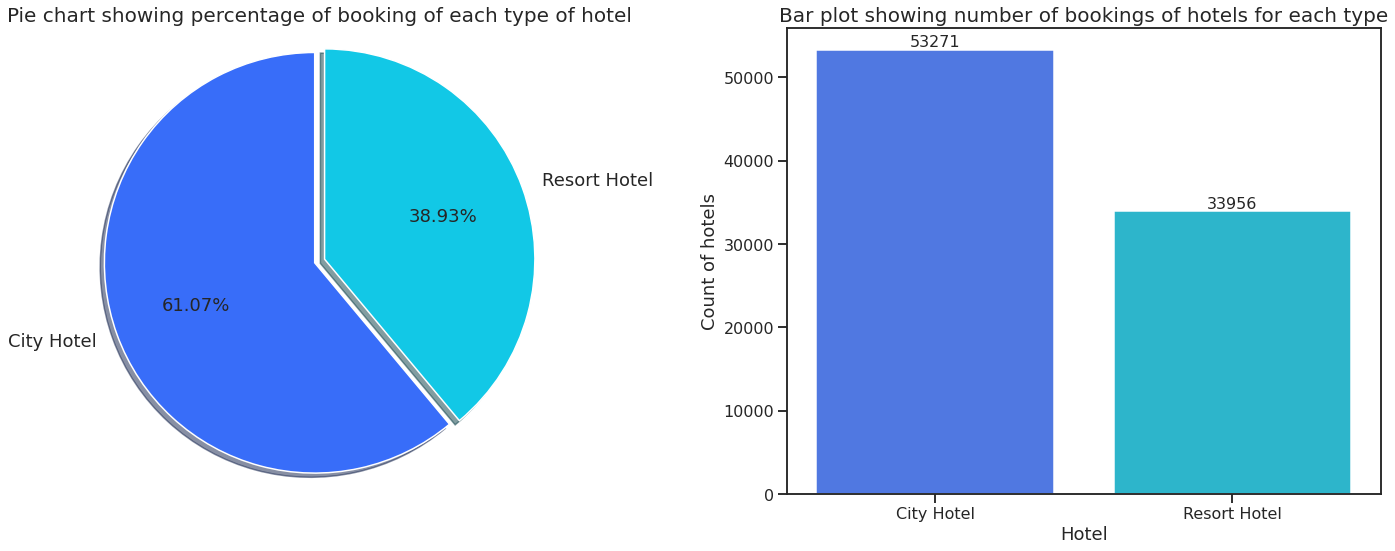

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# plotting the pie plot
data = np.array(booking_df_c['hotel'].value_counts().to_list())
labels = np.array(booking_df_c['hotel'].value_counts().index.to_list())
ax[0].pie(data, labels = labels, autopct='%0.2f%%', explode = [0,0.05], startangle=90, textprops={'fontsize': 18}, shadow = True)
ax[0].axis('equal')
ax[0].set_title('Pie chart showing percentage of booking of each type of hotel', fontsize = 20)

# plotting the bar plot side by side
data_bar = booking_df_c['hotel'].value_counts().reset_index().rename(columns = {'index':'hotel', 'hotel':'count'})
ax[1] = sns.barplot(data = data_bar, y = 'count', x = 'hotel')
ax[1].set_title('Bar plot showing number of bookings of hotels for each type', fontsize = 20)
ax[1].bar_label(ax[1].containers[0], fontsize = 16)
ax[1].tick_params(axis="both", labelsize=16)
ax[1].set_xlabel('Hotel', fontsize = 18)
ax[1].set_ylabel('Count of hotels', fontsize = 18)

plt.tight_layout()
plt.show()



*   People prefer City hostels over Resort hotels as they might be cheaper as compared to the later ones.
*   Number of bookings for City Hotel is almost 1.57 times more than that of Resort Hotel.



Let us have a look at the booking statistics for each hotel throughout the timeline **2015-2017**

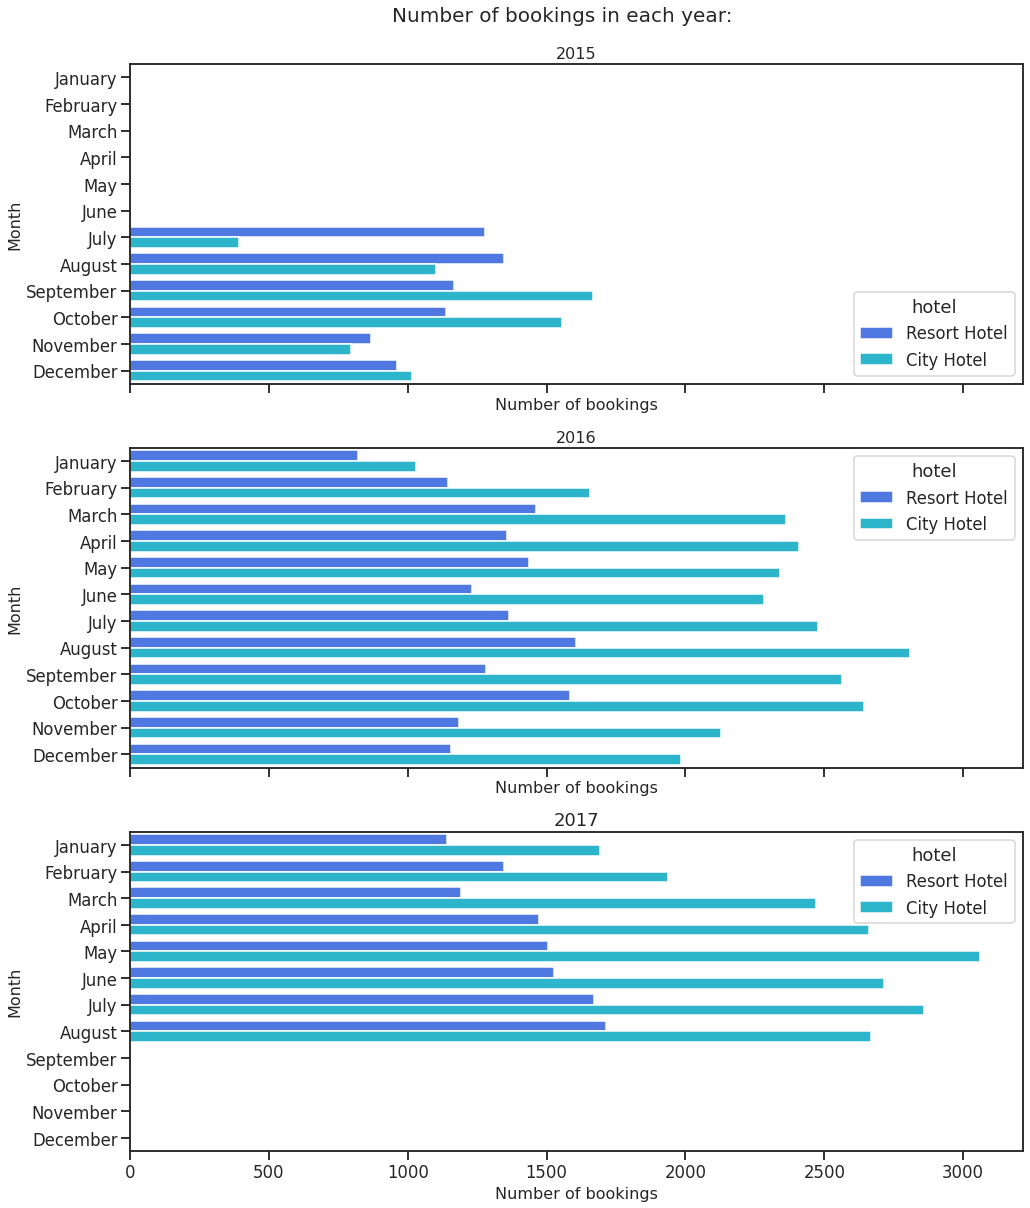

In [ ]:
data_2015=booking_df_c[booking_df_c["arrival_date_year"]==2015]
data_2016=booking_df_c[booking_df_c["arrival_date_year"]==2016]
data_2017=booking_df_c[booking_df_c["arrival_date_year"]==2017]
ordered_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig ,ax=plt.subplots(3,1, sharex = True, figsize=(16,20))
data = [data_2015, data_2016, data_2017]
years = [2015,2016,2017]

for i,year in enumerate(data):
    ax[i].set_title(f'{years[i]}', fontsize=16)
    sns.countplot(data=year, y="arrival_date_month", hue="hotel", order=ordered_month, ax=ax[i])
    ax[i].set_ylabel('Month', fontsize = 16)
    ax[i].set_xlabel('Number of bookings', fontsize = 16)
    plt.title(f'{years[i]}',fontsize=18)
plt.suptitle("Number of bookings in each year:", fontsize=20, y=.92)
plt.show()

The dataset contains data from **July, 2015** to **August, 2017**. Hence, we have 3 years of data for **July** and **August**, while for all other months the dataset contains data for only 2 years. Maximum number of bookings for the Resort hotel was reported in **Aug, 2017** while that of for the City hotel was reported in **May, 2017**.

### **Q. How many bookings were canceled?**

We can split the data into two seperate dataframes containing information of each hotel to ease our analysis.

In [ ]:
resort_ht = booking_df_c[booking_df_c['hotel'] == 'Resort Hotel']
city_ht = booking_df_c[booking_df_c['hotel'] == 'City Hotel']

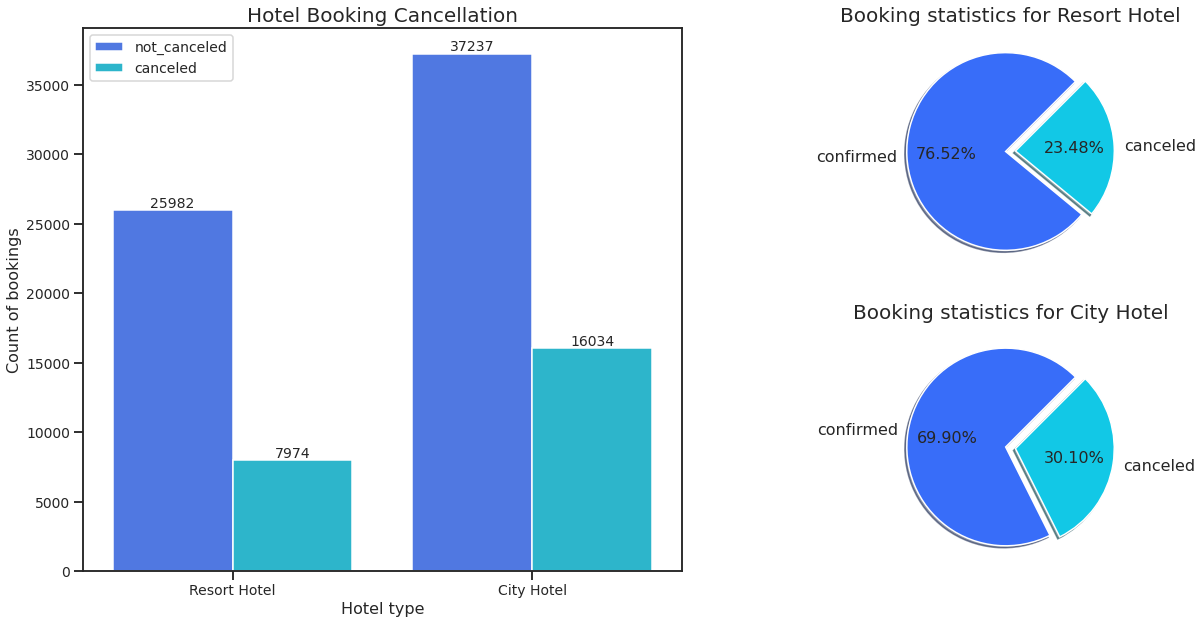

In [ ]:
fig = plt.figure(figsize=(22, 10))
grid = plt.GridSpec(2, 4, hspace=0.2, wspace=0.1)
ax1 = fig.add_subplot(grid[0:, :2])
ax2 = fig.add_subplot(grid[0, 2:])
ax3 = fig.add_subplot(grid[1, 2:])

# countplot to show booking cancelation in each type of hotel
sns.countplot(x= "hotel", data = booking_df_c, hue = "is_canceled", ax = ax1).set_title('Hotel Booking Cancellation', fontsize = 20)
ax1.set_xlabel('Hotel type', fontsize = 16)
ax1.set_ylabel('Count of bookings', fontsize = 16)
ax1.tick_params(axis='both', labelsize=14)
ax1.bar_label(ax1.containers[0], fontsize = 14)
ax1.bar_label(ax1.containers[1], fontsize = 14)
ax1.legend(loc = 0, fontsize = 14)

# pieplot to show booking statistics for Resort Hotel and City Hotel
resort_data = resort_ht['is_canceled'].value_counts(normalize = True)
city_data = city_ht['is_canceled'].value_counts(normalize = True)
titles = ['Resort Hotel', 'City Hotel']
data = [resort_data, city_data]
labels = ['confirmed', 'canceled']
explode = [0.05, 0.05]
for i, ax in enumerate([ax2, ax3]):
    ax.pie(data[i], labels = labels, explode = explode, autopct='%0.2f%%', startangle=45, textprops={'fontsize': 16}, shadow = True)
    ax.set_title(f'Booking statistics for {titles[i]}', fontsize = 20)

From the above analysis, it has been found that the number of guests booking for the City Hotel is more, likewise the percentage of cancellation sees an analogous trend of being **higher** as compared to that of Resort Hotel. The reasons for cancellation in both the hotels have to be figured out in the analysis later.

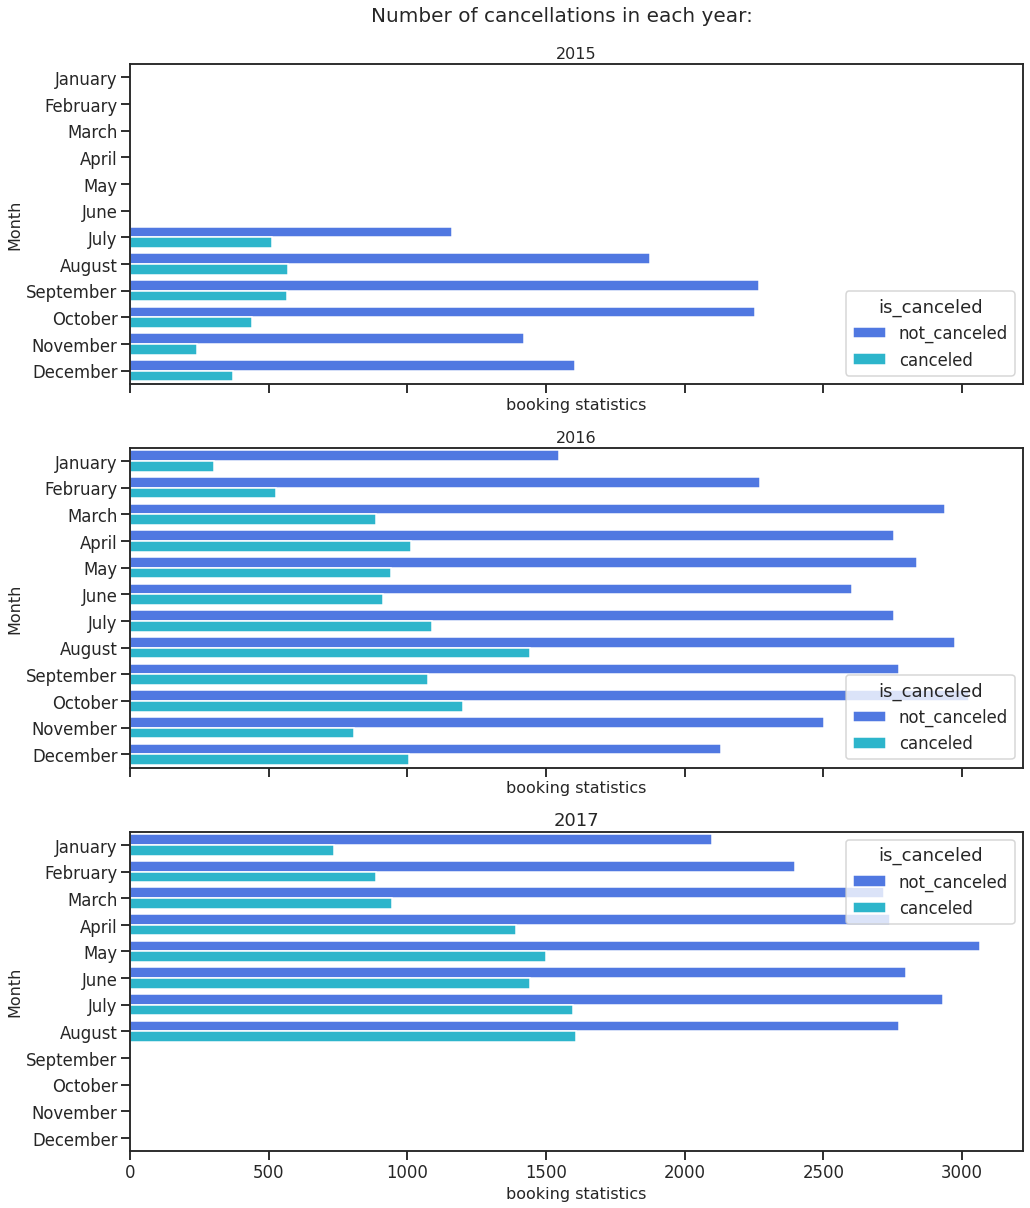

In [ ]:
data_2015=booking_df_c[booking_df_c["arrival_date_year"]==2015]
data_2016=booking_df_c[booking_df_c["arrival_date_year"]==2016]
data_2017=booking_df_c[booking_df_c["arrival_date_year"]==2017]
ordered_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig ,ax=plt.subplots(3,1, sharex = True, figsize=(16,20))
data = [data_2015, data_2016, data_2017]
years = [2015,2016,2017]

for i,year in enumerate(data):
    ax[i].set_title(f'{years[i]}', fontsize=16)
    sns.countplot(data=year, y="arrival_date_month", hue="is_canceled", hue_order = ['not_canceled', 'canceled'], order=ordered_month, ax=ax[i])
    ax[i].set_ylabel('Month', fontsize = 16)
    ax[i].set_xlabel('booking statistics', fontsize = 16)
    plt.title(f'{years[i]}',fontsize=18)
plt.suptitle("Number of cancellations in each year:", fontsize=20, y=.92)
plt.show()

Maximum number of cancellations were seen during summer. The number of cancellations increases with increase in the number of bookings.

### **Q. How long people stay in each hotel?**

Now, let us make a seperate dataframe for all the valid hotel bookings (ie. bookings which were not canceled).

In [ ]:
confirmed_bookings = booking_df_c[booking_df_c['is_canceled'] == 'not_canceled']

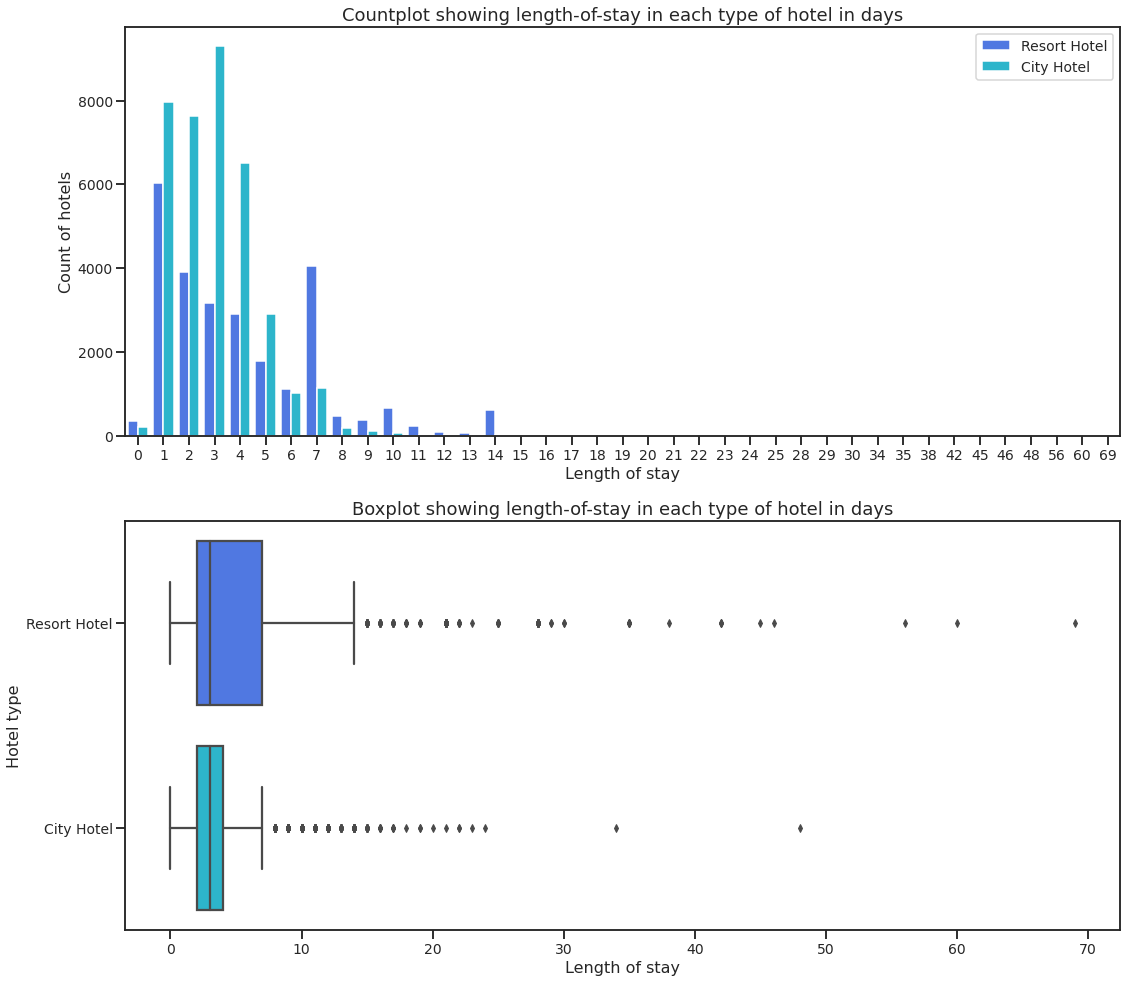

In [ ]:
# plotting two subplots to show the length-of-stay for each type of hotel

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16,14))

# countplot of LOS
fig1 = sns.countplot(x = 'length_of_stay', hue = 'hotel', data = confirmed_bookings, ax = ax[0])
fig1.set_title('Countplot showing length-of-stay in each type of hotel in days', fontsize = 18)
fig1.set_ylabel('Count of hotels', fontsize = 16)
fig1.legend(fontsize = 14, loc = 1)

# boxplot of LOS to find outliers present if any
fig2 = sns.boxplot(x = 'length_of_stay', y = 'hotel', data = confirmed_bookings, ax = ax[1])
fig2.set_title('Boxplot showing length-of-stay in each type of hotel in days', fontsize = 18)
fig2.set_ylabel('Hotel type', fontsize = 16)

for axis in ax.flatten():
    plt.sca(axis)
    plt.xlabel('Length of stay', fontsize = 16)
    plt.tick_params(axis = 'both', labelsize = 14)

plt.tight_layout()
plt.show()

From the above plots, it can be seen that people usually stay for less than 7 days in either of the hotel type. However, there are a few occasions where length-of-stay exceeds 15 days and reaches up to 69 days. Hence, for ease of analysis, we will not consider the outliers and will consider the length-of-stay up to 14 days only.

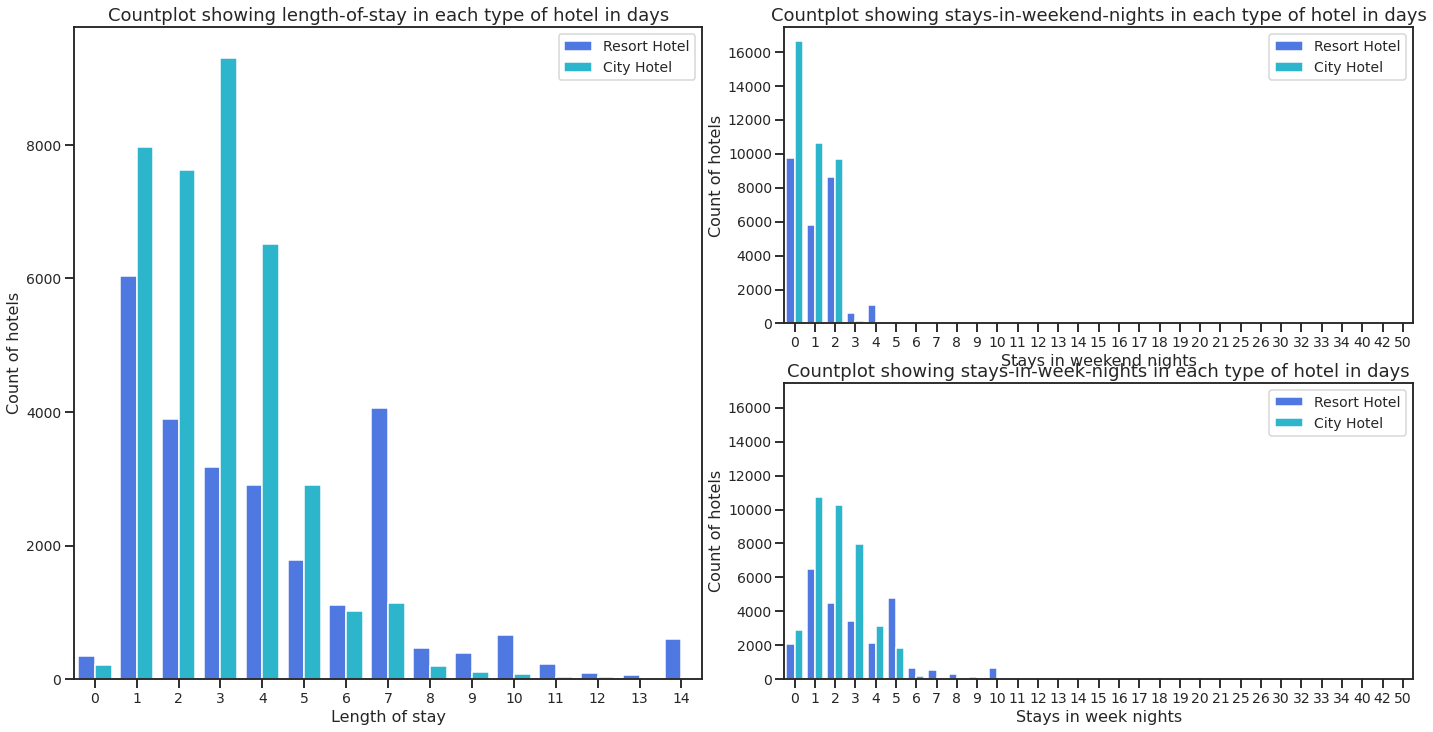

In [ ]:
fig = plt.figure(figsize=(24, 12))
grid = plt.GridSpec(2, 4, hspace=0.2, wspace=0.3)
ax1 = fig.add_subplot(grid[0:, :2])
ax2 = fig.add_subplot(grid[0, 2:])
ax3 = fig.add_subplot(grid[1, 2:], sharex = ax2, sharey = ax2)

data = confirmed_bookings[confirmed_bookings['length_of_stay']<15]

# countplot to show LOS in each type of hotel
fig1 = sns.countplot(x = 'length_of_stay', hue = 'hotel', data = data, ax = ax1)
fig1.set_title('Countplot showing length-of-stay in each type of hotel in days', fontsize = 18)
fig1.set_xlabel('Length of stay', fontsize = 16)
# countplot to show LOS in each type of hotel in weekend nights
fig2 = sns.countplot(x='stays_in_weekend_nights', hue='hotel', data = confirmed_bookings, ax = ax2)
fig2.set_title('Countplot showing stays-in-weekend-nights in each type of hotel in days', fontsize = 18)
fig2.set_xlabel('Stays in weekend nights', fontsize = 16)
# countplot to show LOS in each type of hotel in week nights
fig3 = sns.countplot(x='stays_in_week_nights', hue='hotel', data = confirmed_bookings, ax = ax3)
fig3.set_title('Countplot showing stays-in-week-nights in each type of hotel in days', fontsize = 18)
fig3.set_xlabel('Stays in week nights', fontsize = 16)

for axis in (ax1,ax2,ax3):
    plt.sca(axis)
    plt.ylabel('Count of hotels', fontsize = 16)
    plt.tick_params(axis = 'both', labelsize = 14)
    plt.legend(loc = 'upper right', fontsize = 14)

Most of the guests usually spend less than a week in each type of hotels. For short duration, people tend to stay in city hotels while for spending longer duration, people prefer resort hotel. Number of nights spent in weekdays is higher as compared that of spent in weekends irrespective of the hotel type.

### **Q. How significance is it to have a parking space?**

Let us have a overview of the importance of having a parking space in each of the hotel.

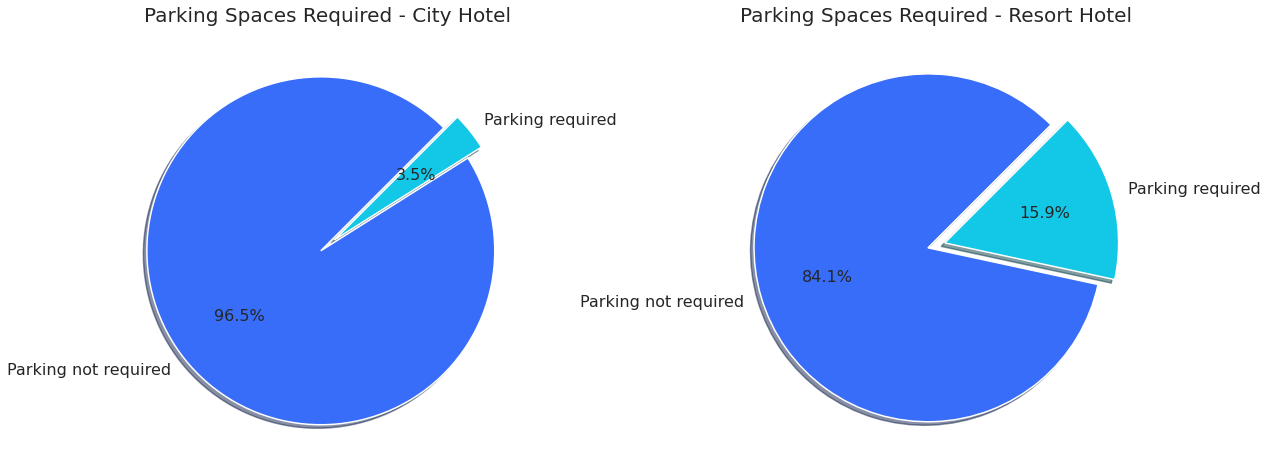

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
explode = (0.05, 0.05)
pie_city = city_ht['required_car_parking_spaces'].value_counts(normalize=True)
pie_resort = resort_ht['required_car_parking_spaces'].value_counts(normalize=True)
titles = ['City Hotel', 'Resort Hotel']

for i, pie in enumerate([pie_city, pie_resort]):
    ax[i].pie(pie[pie > 0.01], labels=['Parking not required', 'Parking required'], autopct='%1.1f%%', explode=explode, startangle=45, textprops={'fontsize': 16}, shadow = True)
    ax[i].set_title(f'Parking Spaces Required - {titles[i]}', fontsize = 20)
plt.show()

* The pie charts show that a majority of customers in both City and Resort hotel do not have a need for a parking space. However, the proportion of customers who require a parking space is higher in Resort hotel compared to City hotel, reaching **15.9%**.
* This highlights the importance of providing **at least 1** parking space per reservation in resort hotels to meet the demands of their customers.

### **Q. Which is the most preferred meal type?**

Checking the different types meals served at each hotel:

In [ ]:
confirmed_bookings.groupby('hotel')['meal'].value_counts()

hotel         meal     
City Hotel    BB           29291
              SC            5982
              HB            1955
              FB               9
Resort Hotel  BB           20571
              HB            4676
              Undefined      410
              FB             252
              SC              73
Name: meal, dtype: int64

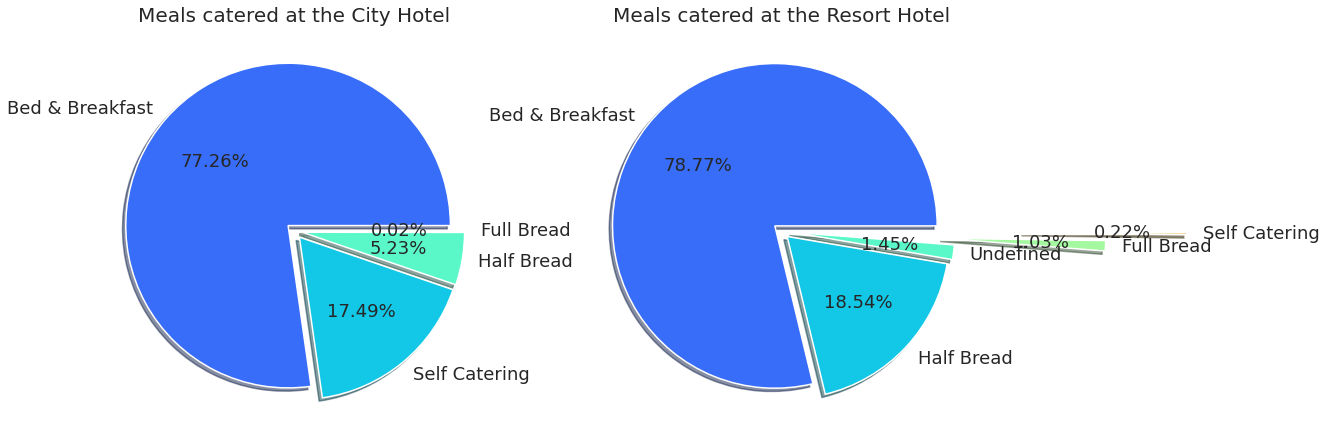

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,8))

pie_city = city_ht['meal'].value_counts()
pie_resort = resort_ht['meal'].value_counts()
titles = ['City Hotel', 'Resort Hotel']
label1 = ['Bed & Breakfast', 'Self Catering', 'Half Bread', 'Full Bread']
label2 = ['Bed & Breakfast', 'Half Bread', 'Undefined', 'Full Bread', 'Self Catering']
labels = [label1 , label2]
explode1 = [0.05,0.05,0.05,0.05]
explode2 = [0.05,0.05,0.07,1,1.5]
explode = [explode1, explode2]

for i, pie in enumerate([pie_city, pie_resort]):
    ax[i].pie(pie, labels = labels[i], autopct='%1.2f%%', explode = explode[i], shadow = True, textprops={'fontsize': 18})
    ax[i].set_title(f'Meals catered at the {titles[i]}', fontsize = 20)
# plt.tight_layout()
plt.show()

* The **Bed and Breakfast** (BB) plan is the most popular meal plan in both hotels, with City Hotel serving 77.26% and Resort Hotel serving 78.77% of the total meals under this plan. This suggests that guests at both hotels prefer a flexible option that allows them to dine outside of the hotel.
* The **Half Board** (HB) plan is more popular at the Resort Hotel as compared to at the City Hotel. This could indicate that guests at the Resort Hotel are more interested in dining at the hotel compared to those at the City Hotel.
* The very low number of meals served under the **FB** plan at both the hotels suggests that this may not be a popular option for guests.
* The low number of meals served under the **SC** plan at both hotels suggests that guests are not interested in this option. The business may want to re-evaluate this offering and determine if it is worth continuing to offer.
* **Undefined** meal plan at Resort Hotel with 410 meals served, suggesting confusion or miscommunication regarding meal options. The business should investigate this further and determine what changes can be made to ensure a clear understanding of the meal options for guests.

### **Q. Does higher lead time lead to booking cancelations?**

<Figure size 864x576 with 0 Axes>

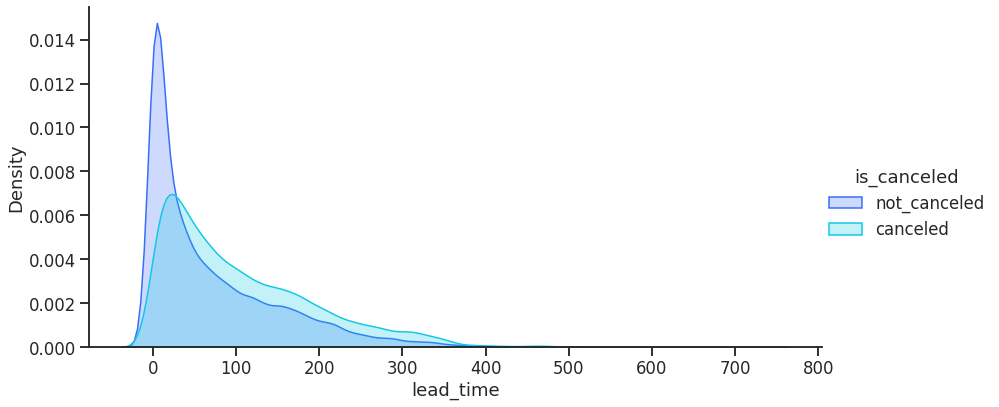

In [ ]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(booking_df_c, hue = 'is_canceled', height = 6, aspect = 2).map(sns.kdeplot, 'lead_time', shade = True).add_legend()

When the lead time exceeds around **50** days, the cancellation rate among guests increases. To meet the needs of customers, it is crucial to provide accurate, real-time information and offer flexible booking options that allow for easy modifications. This will help to reduce the risk of cancellations and enhance customer satisfaction.

Text(0.5, 1.0, 'Median Lead Time and canceled bookings count per month')

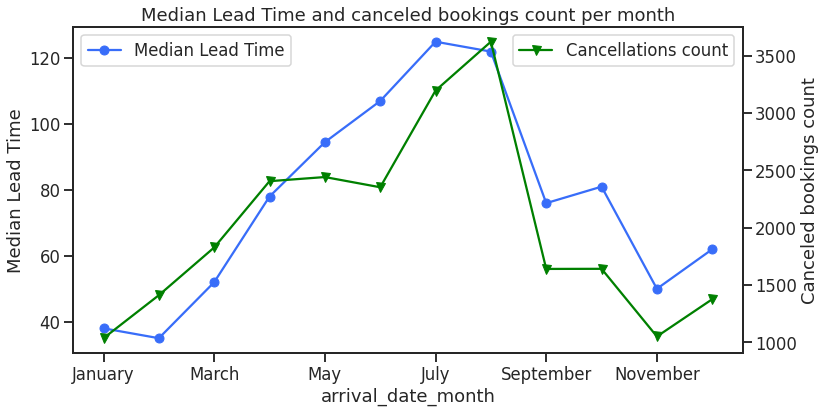

In [ ]:
cancel_lead_time  = booking_df_c[booking_df_c['is_canceled'] == 'canceled'].groupby('arrival_date_month')['lead_time'].median().reindex(ordered_month)
cancel_count = booking_df_c[booking_df_c['is_canceled'] == 'canceled'].groupby('arrival_date_month').size().reindex(ordered_month)

fig, ax = plt.subplots(figsize = (12,6))
ax = cancel_lead_time.plot(kind = 'line', marker = 'o')
ax.set_ylabel('Median Lead Time')
ax.legend(['Median Lead Time'], loc = 'upper left')
ax1 = ax.twinx()
ax1 = cancel_count.plot(kind = 'line', marker = 'v', color = 'green')
ax1.set_ylabel('Canceled bookings count')
ax1.legend(['Cancellations count'], loc = 'upper right')
plt.title('Median Lead Time and canceled bookings count per month')

The data shows that as **lead time** increases, the number of cancellations in hotel bookings also tends to increase. While there may be various reasons for cancellations, such as changes in travel plans or unforeseen circumstances, hotels should be aware that guests may be more likely to cancel their reservations the further out they are made.

### **Q.  Which is the most sought room?**

In [ ]:
# value counts of each room type
confirmed_bookings['assigned_room_type'].value_counts()

A    32106
D    16987
E     5495
F     2733
C     1765
G     1742
B     1412
H      457
I      348
K      174
Name: assigned_room_type, dtype: int64

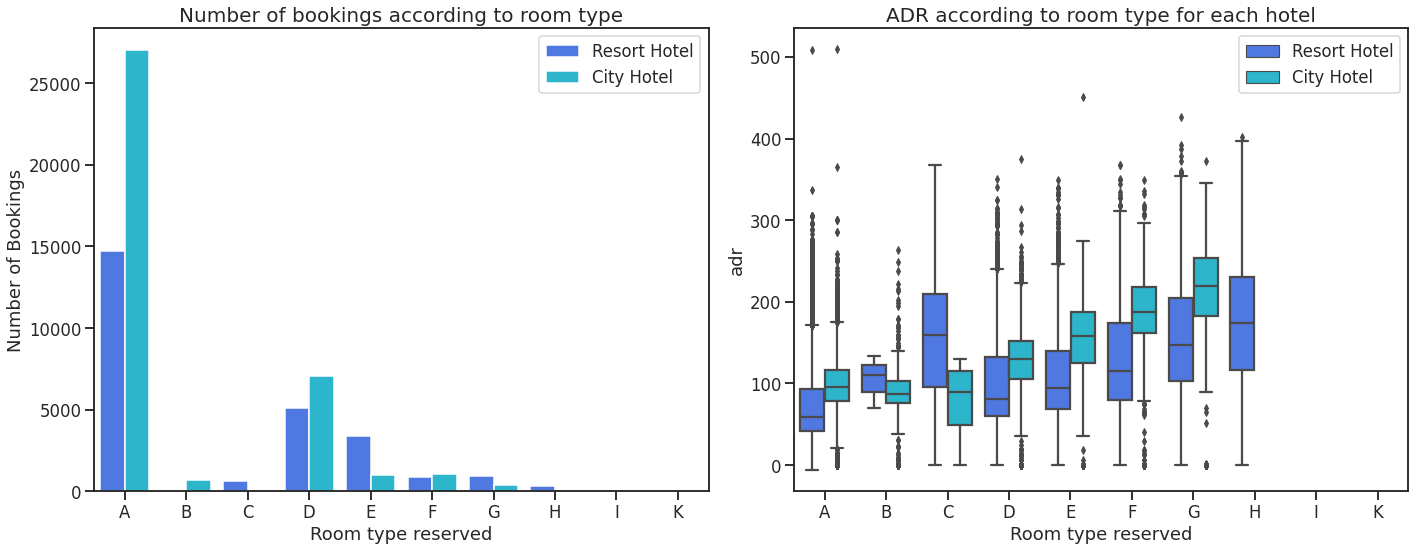

In [ ]:
# Number of bookings according to room type
fig, ax = plt.subplots(1,2,figsize=(20,8))
ordered_rooms = np.sort(confirmed_bookings['assigned_room_type'].unique())
fig1 = sns.countplot(x='reserved_room_type', hue='hotel', data=confirmed_bookings, order = ordered_rooms, ax = ax[0])
fig1.set_xlabel("Room type reserved")
fig1.set_ylabel("Number of Bookings")
fig1.set_title("Number of bookings according to room type", fontsize = 20)
fig1.legend(loc = 1)

fig2 = sns.boxplot(x="reserved_room_type", y="adr", hue="hotel", data=confirmed_bookings, order = ordered_rooms, ax = ax[1])
fig2.set_xlabel("Room type reserved")
fig2.set_title("ADR according to room type for each hotel", fontsize = 20)
fig2.legend(loc = 1)

plt.tight_layout()
plt.show()

* The room type with the most number of bookings is **A** followed by **D**. In case of Resort hotel, room type **A** and **D** requiress lower *ADR*. This could be one of the contributing factors to choose these 2 rooms over others. Even though the median average daily rate (*ADR*) for these rooms is not the lowest, guests at the City hotel tend to prefer them.
* Other types of room have also reservaions but number is low as compared to the former ones. The reason for that could be because of the high ADR these rooms cost. Rooms of type **I** and **K** have very few bookings. The room type **L** has only 1 booking that too got cancelled.

We will need to figure out which room type suits which category of people as the guests visting the hotels belong to either adults or adults with children and babies or children only..

In [ ]:
# dataframe with only 1 adult
adult_count1 = confirmed_bookings[confirmed_bookings['adults'] == 1]['reserved_room_type'].value_counts()
# dataframe with 2 adults
adult_count2 = confirmed_bookings[confirmed_bookings['adults'] == 2]['reserved_room_type'].value_counts()
# dataframe with 3 adults
adult_count3 = confirmed_bookings[confirmed_bookings['adults'] == 3]['reserved_room_type'].value_counts()
# dataframe with equal to or greater than 4 adults
adult_count4 = confirmed_bookings[confirmed_bookings['adults'] >= 4]['reserved_room_type'].value_counts()
# dataframe with only children
child_count = confirmed_bookings[confirmed_bookings['adults'] == 0]['reserved_room_type'].value_counts()
# dataframe with both adults and children
total_count = confirmed_bookings['reserved_room_type'].value_counts()

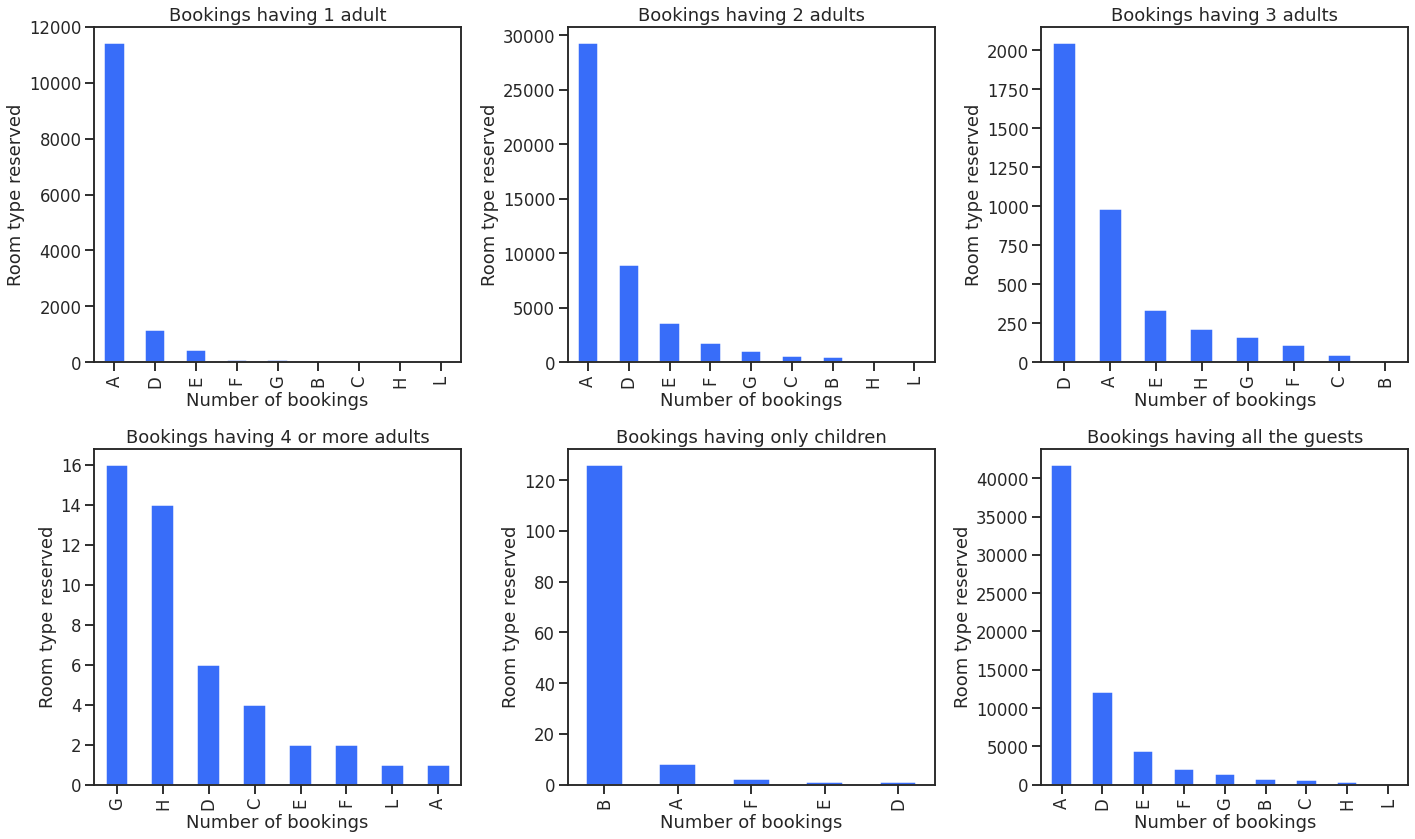

In [ ]:
data = [adult_count1, adult_count2, adult_count3, adult_count4, child_count, total_count]
titles = ['1 adult', '2 adults', '3 adults', '4 or more adults', 'only children', 'all the guests']

fig, ax = plt.subplots(2, 3, figsize=(20, 12))
ax = ax.flatten()

for i in range(len(data)):
    data[i].plot(kind='bar', ax=ax[i])
    ax[i].set_title(f'Bookings having {titles[i]}', fontsize = 18)
    ax[i].set_xlabel('Number of bookings')
    ax[i].set_ylabel('Room type reserved')

plt.tight_layout()
plt.show()

* Most of the guests checking in are single adult or a couple of adults. The order of preference of the room type remains same in case of guests with 1 or 2 adults. Most preferred room type is **A** followed by **D**, **E**, **F** and **G**.
* Bookings with 3 adults mostly prefer room **D** followed by **A**, **E**, **H**, **G** and **F**.
* There are a few bookings with guests having 4 or more adults. Their most preferred room is **G**. While some of them also booked **H**, **D**, **C**, **F**, **E**, **L** and **A** in order of preference.
* There may be a case when adults can not accompany the children and babies. In that scenario, adults can book rooms for their children at places they can't watch them over. Hence, if someone wants to book any room for any children the order of preference will be **B**, **A**, **F**, **E** and **D**.
* Most number of bookings were made for 2 adults. For all of the bookings, most preferred room was **A** followed by **D**, **E**, **F** and **G**.

### **Q.  Which is the busiest month?**

In [ ]:
ordered_month = np.array(['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December'])

In [ ]:
data = confirmed_bookings.groupby('arrival_date_month')['hotel'].value_counts().unstack().reindex(ordered_month)\
.reset_index().rename_axis(None, axis=1)

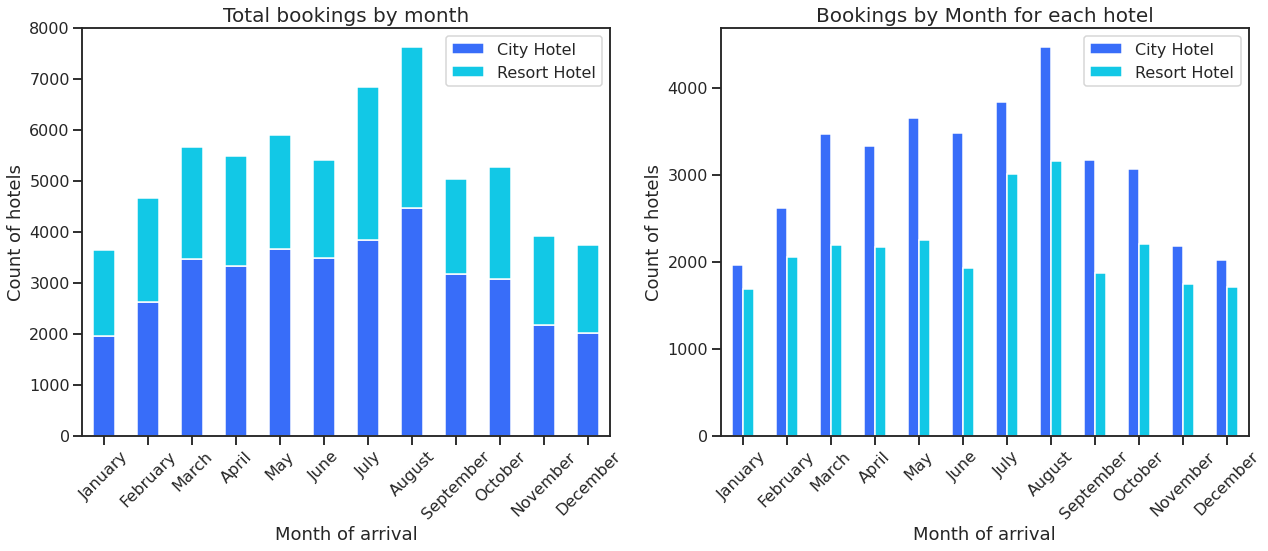

In [ ]:
# plotting the total bookings by month and bookings by month for each hotel
fig, ax = plt.subplots(1,2,figsize=(18,8))

data.plot(x = 'arrival_date_month', kind = 'bar', stacked = True, ax = ax[0], fontsize = 16)
ax[0].set_title('Total bookings by month', fontsize = 20)

data.plot(x = 'arrival_date_month', kind = 'bar', ax = ax[1], fontsize = 16)
ax[1].set_title('Bookings by Month for each hotel', fontsize = 20)

for axis in ax.flatten():
    plt.sca(axis)
    plt.xlabel('Month of arrival', fontsize = 18)
    plt.ylabel('Count of hotels', fontsize = 18)
    plt.xticks(fontsize = 16, rotation = 45)
    plt.yticks(fontsize = 16)
    plt.legend(fontsize = 16)

plt.tight_layout()
plt.show()

Both these hotels enjoy a good number of guests during the spring and summer seasons. However, this number decreases once autumn kicks in and the number goes on decreasing till winter. ADR might be an important factor in attracting guests during different seasons which we will discuss later.

### **Q. Which hotel has higher adr(price per night) and which one makes more revenue?**

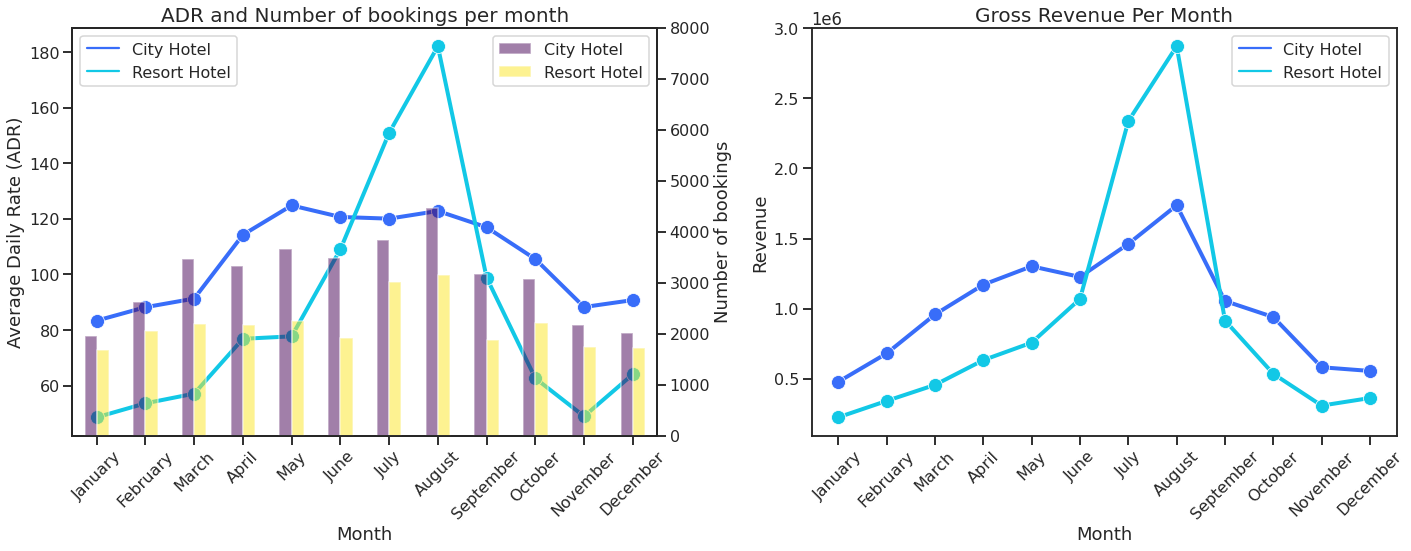

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

data = confirmed_bookings.groupby(['arrival_date_month','hotel']).agg({'adr':np.mean, 'revenue':np.sum}).reset_index()
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories = ordered_month, ordered = True)
fig1 = sns.lineplot(data=data , x='arrival_date_month', y='adr', hue='hotel', linewidth = 4, marker = 'o', ax = ax[0], markersize=14)
ax[0].set_title('ADR and Number of bookings per month', fontsize=20)
ax[0].set_ylabel('Average Daily Rate (ADR)', fontsize = 18)
ax[0].legend(loc = 'upper left', fontsize = 16)
ax1 = ax[0].twinx()

# plotting a bar plot showing the total bookings per month
data1 = confirmed_bookings.groupby('arrival_date_month')['hotel'].value_counts().unstack().reindex(ordered_month)\
.reset_index().rename_axis(None, axis=1)
data1.plot(x='arrival_date_month', kind = 'bar', cmap = 'viridis', ylim = [0,8000], ax = ax1, fontsize = 16, alpha = 0.5)
ax1.set_ylabel('Number of bookings', fontsize = 18)
ax1.legend(loc = 'upper right', fontsize = 16)

fig2 = sns.lineplot(data=data , x='arrival_date_month', y='revenue', hue='hotel', linewidth = 4, marker = 'o', ax = ax[1], markersize=14)
ax[1].set_title('Gross Revenue Per Month', fontsize=20)
ax[1].set_ylabel('Revenue', fontsize = 18)
ax[1].legend(fontsize = 16)

for axis in ax.flatten():
    plt.sca(axis)
    plt.xlabel('Month', fontsize = 18)
    plt.xticks(fontsize = 16, rotation = 45)
    plt.yticks(fontsize = 16)
plt.tight_layout()
plt.show()

Irresepective of the higher price, the number of bookings increases during spring and it keeps on increasing till summer. During the busier seasons, ADR seems to be on the higher side. Maximum revenue is generated during summer when people usually go out for spending their vacation while minimum revenue is generated during the winter season.

Let us check whether higher ADR leads to guests canceling the bookings or not:

Text(0.5, 1.0, 'Median ADR and canceled bookings count per month')

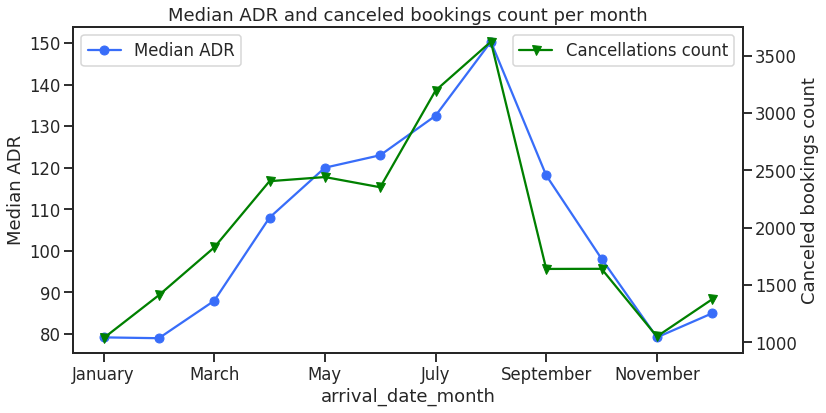

In [ ]:
cancel_adr  = booking_df_c[booking_df_c['is_canceled'] == 'canceled'].groupby('arrival_date_month')['adr'].median().reindex(ordered_month)
cancel_count = booking_df_c[booking_df_c['is_canceled'] == 'canceled'].groupby('arrival_date_month').size().reindex(ordered_month)

fig, ax = plt.subplots(figsize = (12,6))
ax = cancel_adr.plot(kind = 'line', marker = 'o')
ax.set_ylabel('Median ADR')
ax.legend(['Median ADR'], loc = 'upper left')
ax1 = ax.twinx()
ax1 = cancel_count.plot(kind = 'line', marker = 'v', color = 'green')
ax1.set_ylabel('Canceled bookings count')
ax1.legend(['Cancellations count'], loc = 'upper right')
plt.title('Median ADR and canceled bookings count per month')

We can see from the above plot that as ADR increases, number of cancellations also increases. This can be due the fact that guests often book a hotel but at the time of checking in they seem reluctant to pay such a high price and look for alternative hotels.

### **Q. When do guests of different types visit the hotels?**

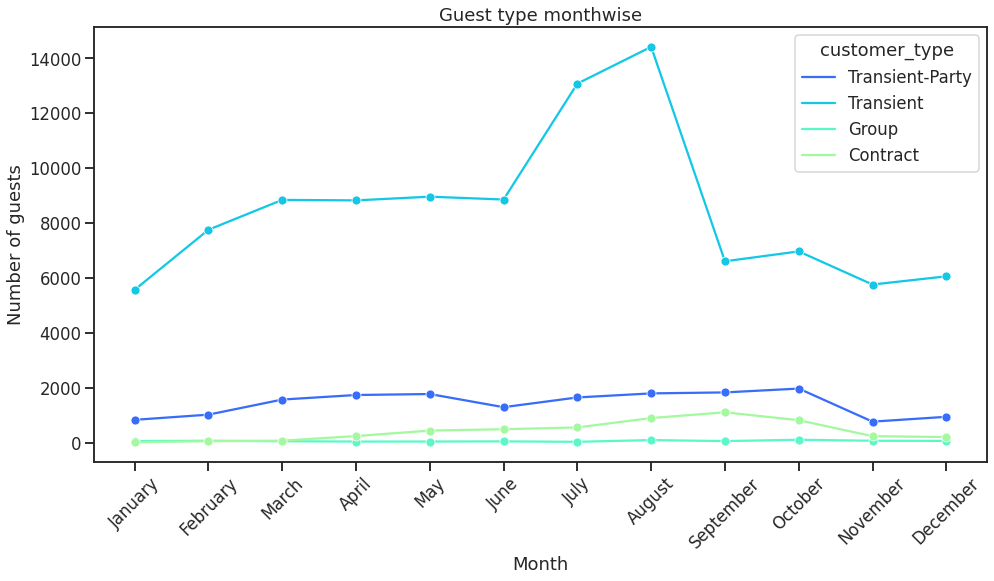

In [ ]:
data_cust = confirmed_bookings.groupby(['arrival_date_month', 'customer_type'])['guest_in_total'].sum().reset_index()
ordered_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data_cust['arrival_date_month'] = pd.Categorical(data_cust['arrival_date_month'], categories = ordered_month, ordered=True)
data_cust = data_cust.sort_values('arrival_date_month')

plt.figure(figsize = (16,8))
p = sns.lineplot(x='arrival_date_month', y='guest_in_total', hue='customer_type', data=data_cust, marker = "o")
plt.xticks(rotation=45)
plt.title("Guest type monthwise")
plt.xlabel("Month")
plt.ylabel("Number of guests")
plt.show()

* There is a heightened presence of Transient-Party guests in October.
* Transient guests experience a noticeable surge in numbers from June to August.
* The Group type guest count remains consistently low throughout the year.
* Contract guests exhibit a low attendance rate in the first half of the year. But the number surges till September and gradually falls till it hits December.

### **Q. From where do the most guests come?**


Checking the country of origin of the guests that booked the hotels-

In [ ]:
confirmed_bookings['country'].value_counts().head()

PRT    17572
GBR     8439
FRA     7091
ESP     5382
DEU     4332
Name: country, dtype: int64

Since, countries are mentioned in their respective codes, we will get their full names with the help of a python library called "**pycountry**"

In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 44.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=dfabc261117f75a5103ec5923fda9de487b14352eecf152e477957dc9f0b8896
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [ ]:
#importing pycountry to get the corresponding names of the countries against their codes
import pycountry as pc

In [ ]:
list_alpha_2 = [i.alpha_2 for i in list(pc.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pc.countries)]

In [ ]:
def country_name(code):
    try:
        if (len(code)==2 and code in list_alpha_2):
            return pc.countries.get(alpha_2=code).name
        elif (len(code)==3 and code in list_alpha_3):
            return pc.countries.get(alpha_3=code).name
    except KeyError:
            return code

In [ ]:
confirmed_bookings['country_names'] = confirmed_bookings['country'].apply(country_name)

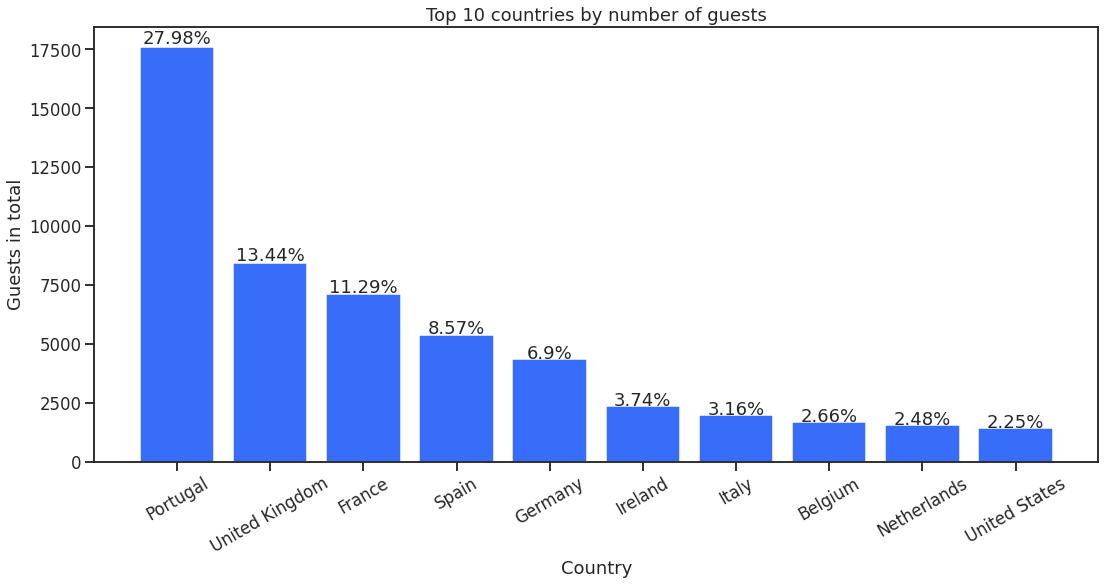

In [ ]:
bookings_countrywise = confirmed_bookings['country_names'].value_counts().reset_index().rename(columns={'index':'Country', 'country_names':'Guests in total'})
top_10_countries = bookings_countrywise.nlargest(10, 'Guests in total')
top_10_countries_p = confirmed_bookings['country_names'].value_counts(normalize = True).sort_values(ascending=False)[:10]
plt.figure(figsize=(18,8))
plt.bar(top_10_countries['Country'], top_10_countries['Guests in total'])
plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Guests in total")

for i, p in enumerate(plt.gca().patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    plt.text(x+width/2, y+height*1.01, str(round(top_10_countries_p[i]*100, 2))+'%', ha='center')

plt.title("Top 10 countries by number of guests")
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
basemap = folium.Map()
guests = confirmed_bookings['country'].value_counts().reset_index().rename(columns={'index':'Country', 'country':'Guests in total'})
guests_map = px.choropleth(guests,
                           locations = 'Country',
                           color = 'Guests in total',
                           hover_data = guests.columns.to_list(),
                           color_continuous_scale = px.colors.sequential.Oranges,
                           hover_name = 'Country')
guests_map.show()

From the above information, it can be observed that people from all over the globe visit these two hotels.However, most of the hotel bookings are from **Portugal**, followed by-

*   **United Kingdom**
*   **France**
*   **Spain**, and
*   **Germany**

So, majority of the visitor are from European countries.








### **Q. Which agent makes the most number of bookings?**

In [ ]:
# checking the agent column
confirmed_bookings['agent'].value_counts().head()

9      17198
0      10593
240     8084
7       2858
14      2759
Name: agent, dtype: int64

There are some entries with Agent_ID = 0 as they were booked without any help from an agent. So, we need to get rid of those entries.

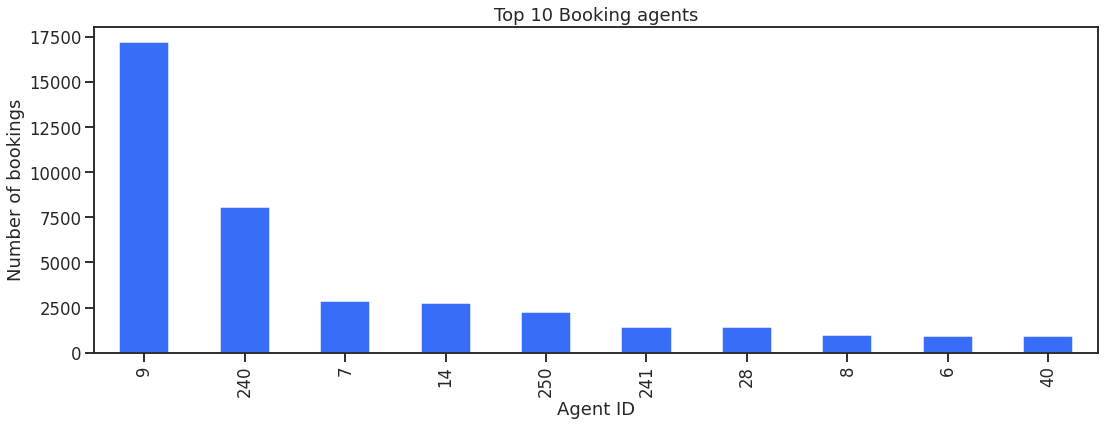

In [ ]:
data = confirmed_bookings[~(confirmed_bookings['agent'] == 0)]['agent'].value_counts()

# plotting the barplot
plt.figure(figsize=(18,6))
data.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel("Agent ID")
plt.ylabel("Number of bookings")
plt.title("Top 10 Booking agents")
plt.show()

* Maximum number of bookings were made by the agent with ID=**9** followed by **240, 7, 14** and **250**.
* A significant number of bookings were made without the use of any agent.

### **Q. Which distribution channel makes the most out of bookings of each hotel?**

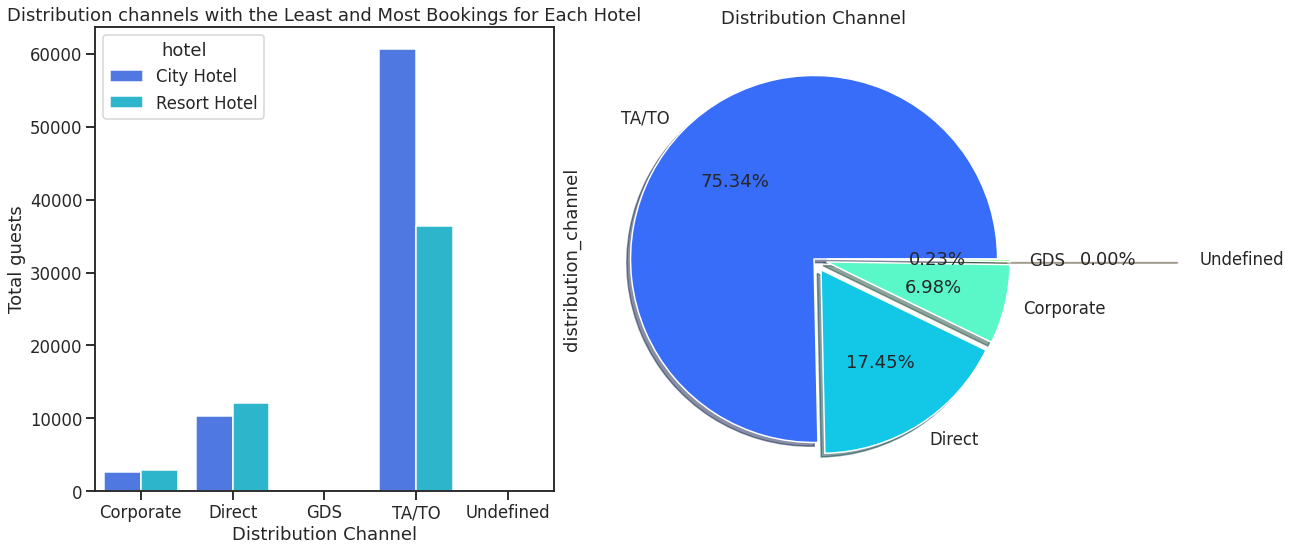

In [ ]:
dist_channel = confirmed_bookings.groupby(['distribution_channel', 'hotel'])['guest_in_total'].sum().reset_index()
dist_channel_p = confirmed_bookings['distribution_channel'].value_counts(normalize=True)

fig, ax = plt.subplots(1, 2, figsize=(18, 8))
fig1 = sns.barplot(x="distribution_channel", y="guest_in_total", hue="hotel", data=dist_channel, ax = ax[0])
ax[0].set_title("Distribution channels with the Least and Most Bookings for Each Hotel")
ax[0].set_xlabel("Distribution Channel")
ax[0].set_ylabel("Total guests")
fig2 = dist_channel_p.plot.pie(ax=ax[1], explode = [0, 0.07, 0.07, 0.07, 1], autopct='%1.2f%%', shadow = True)
ax[1].set_title('Distribution Channel')

plt.tight_layout()
plt.show()

* The majority of bookings at the hotels come from guests in the **Online/Offline Travel Agency** distribution channel, followed by those in the Direct channel.
* **Coporate** and **GDS** channels have a low participation in the booking numbers for each hotel.

### **Q. Which market segment makes the most out of bookings of each hotel?**

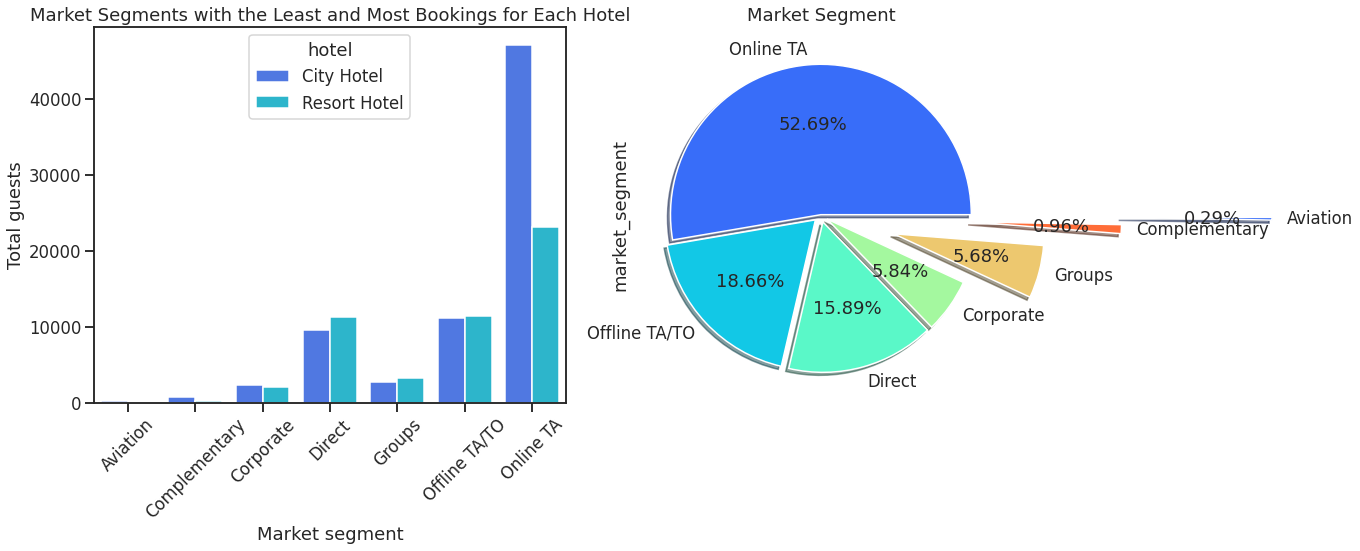

In [ ]:
market_seg = confirmed_bookings.groupby(['market_segment', 'hotel'])['guest_in_total'].sum().reset_index()
market_seg_p = confirmed_bookings['market_segment'].value_counts(normalize=True)

fig, ax = plt.subplots(1,2,figsize = (20,8))
# plotting a barplot to check the strongest and the weakest market segment for each hotel
fig1 = sns.barplot(x="market_segment", y="guest_in_total", hue="hotel", data=market_seg, ax = ax[0])
ax[0].tick_params(axis = 'x', rotation = 45)
ax[0].set_title("Market Segments with the Least and Most Bookings for Each Hotel")
ax[0].set_xlabel("Market segment")
ax[0].set_ylabel("Total guests")
# plotting a pieplot to
fig2 = market_seg_p.plot.pie(ax=ax[1], explode = [0, 0.05, 0.05, 0.05, 0.5, 1, 2], autopct='%1.2f%%', shadow = True)
ax[1].set_title('Market Segment')

plt.tight_layout()
plt.show()

* The majority of bookings at the hotels come from guests in the **Online Travel Agency** market segment, followed by those in the **Offline Travel Agency** market segment.
* Meanwhile, the **Aviation**, **Complementary**, **Corporate** and **Groups** segments show comparatively low booking numbers.

## **Recommendations**


* The City and Resort hotels have high **cancellation** rates, indicating a need for investigation. Guest surveys can be used to create a dataset to identify reasons and demographics behind the cancellations, and to develop targeted actions and a machine learning model to forecast cancellations. Such measures can help improve the booking retention rates and overall financial performance of the hotels.
* Based on the data analysis, it has been observed that the majority of bookings in the industry are represented by transient and transient-party bookings. These bookings primarily originate from online and offline travel agencies. In light of this, it is recommended that other **market segments** should implement strategies that are similar to those used by travel agencies to increase their bookings and overall market share.
* The most common **type of guests** in the hotel are Transient and Transient-Party guests. To diversify the guest mix, it is recommended to implement strategies to attract more Contract and Group guests. For example, offering yearly subscriptions and providing benefits that differentiate them from regular Transient and Transient-Party guests can be a successful strategy to target these segments.
* Instead of transforming low-demand **room types** to high-demand room types, it's important to consider the unique features and customer preferences before making any changes. Exploring other strategies like pricing or marketing could be more effective in increasing demand for the underperforming room types. From the analysis, it is seen that not all rooms have the same amount of demands. Mostly, A and D have the highest reservations while others seem to fail in attracting the guests. Hence, it is advisable to transform all the rooms A, D, G or B type to maximise the revenue generation and to serve the guest better.
* From business perspective, hotels with many unused **parking spaces** may consider converting some of them into revenue-generating spaces that provide value to the hotel. The logistic team at the resort hotel should be mindful that around 16% of guests will likely need at least one parking space, and ensure there are enough spots to accommodate all cars.
* The data suggests that there is a correlation between higher **ADR** and increased cancellation rates. While it's possible that some guests are reluctant to pay premium prices and therefore seek alternative accommodations, other factors may also contribute to cancellations, such as changes in travel plans or negative reviews. Hotel operators should be mindful of this relationship and work to identify the optimal balance between pricing and guest satisfaction to maximize their revenue potential and maintain a strong reputation in the marketplace. Few of the **strategies** that hotels can implement are: *review and adjust pricing strategy to ensure competitiveness, offer special promotions and discounts, provide more value-added services or amenities to justify higher ADR* etc.
* High **lead time** leads to high cancellations. Hence, a number of strategies can be implemented by the hotels to reduce the cancellatons such as- *implement a flexible cancellation policy, encourage direct bookings, consider dynamic pricing strategies, develop targeted last-minute marketing campaigns* etc.


## **Conclusion**

EDA is a key component of data analysis as it provides an initial understanding of the data. Through examination of distributions, summary statistics, relationships between variables, and identification of outliers, valuable insights can be obtained. This information can be used to make data-driven improvements in various aspects of the hotel business, such as maximizing profits, reducing expenses, minimizing cancelations and improving customer service.